In [1]:
# Decision Tree Classification Algorithm 

In [24]:
# Load Csv file
import pandas as pd
dataset=pd.read_csv('Social_Network_Ads.csv')

In [25]:
# Descriptive Head of a dataset
print(dataset.head(5))
# Descriptive shape of a dataset
print(dataset.shape)
# Descriptive data type of a dataset
print(dataset.dtypes)

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
(400, 5)
User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


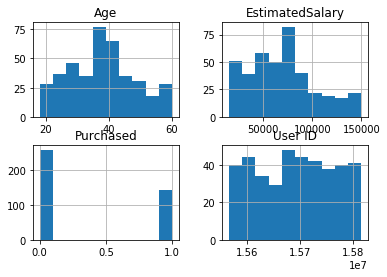

In [26]:
# Visualisation plot for each attribute to know what kind of distribution it is ?

import matplotlib.pyplot as plt
# Histogram plot visualisation
dataset.hist()
plt.show()

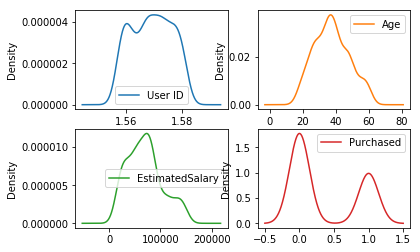

In [27]:
# Density plot visualisation 
dataset.plot(kind='density',subplots=True,sharex=False,sharey=False,layout=(2,2))
plt.show()

In [34]:
# Split the dataset into input and output attribute
array=dataset.values
x=array[:,1:-1]
y=array[:,-1]
y=y.astype('int')
print("--------------- x Input Attribute----------------")
print(x[:5,:])
print("--------------- Y Output Attribute---------------")
print(y[:5,])

--------------- x Input Attribute----------------
[['Male' 19L 19000L]
 ['Male' 35L 20000L]
 ['Female' 26L 43000L]
 ['Female' 27L 57000L]
 ['Male' 19L 76000L]]
--------------- Y Output Attribute---------------
[0 0 0 0 0]


In [35]:
# Label Encoder convert categorical value into numerical values
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
x[:,0]=labelencoder.fit_transform(x[:,0])
print(x[:5,:])

[[1 19L 19000L]
 [1 35L 20000L]
 [0 26L 43000L]
 [0 27L 57000L]
 [1 19L 76000L]]


In [36]:
# Applying Standard Scaler technique to rescale data
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x=std.fit_transform(x)
print(x[:5,:])

[[ 1.02020406 -1.78179743 -1.49004624]
 [ 1.02020406 -0.25358736 -1.46068138]
 [-0.98019606 -1.11320552 -0.78528968]
 [-0.98019606 -1.01769239 -0.37418169]
 [ 1.02020406 -1.78179743  0.18375059]]


In [37]:
# Splitting dataset into train and test set
seed=5
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,test_size=0.20,random_state=seed)

In [38]:
# Decision Tree Classification Algorithm
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
# predict the Decision Tree Classification algorithm
y_pred=decision.predict(x_test)
print(y_pred[:5,])

[0 0 0 0 0]


In [40]:
# Evaluate Performance Metrics of an algorithm
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,decision.predict(x_test))
print(confusion)

[[45  8]
 [ 5 22]]


In [ ]:
# we have 10 incorrect prediction for decision tree classification algorithm

In [41]:
# Classification Accuracy metrics
def classification_accuracy(actual,predicted):
    correct=0.0
    for i in range(len(actual)):
        if actual[i]==predicted[i]:
            correct+=1
    return correct/float(len(actual))

In [42]:
# Accuracy of an algorithm
accuracy=classification_accuracy(y_test,decision.predict(x_test))
print(accuracy)

0.8375


In [ ]:
# Got 83.75 accuracy for Decision Tree Classification algorithm
# Still 93.75% KNN algorithm giving best Accuracy.